In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import pickle
import keras
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.optimizers import SGD, Adam
from keras import backend as K
from keras.models import Model

#pip3 install scikit-image==0.14.2 --user
#pip3 install numpy==1.16.3 --user
#https://stackoverflow.com/questions/54241226/importerror-cannot-import-name-validate-lengths  --comment of 'Alka'

Using TensorFlow backend.


# Summary

In this notebook, the output images for all colour channel of each layer in the convolutional neural network auto-encoder (CNN Auto-encoder) is visualized. <br>
The CNN Auto-encoder used here has many layers. In order to perform quicker training, the model training is done on PASCAL VOC 2009 dataset on Google Colab. The model is saved and imported in this notebook.

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
#%cd gdrive/My\ Drive/Colab\ Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [4]:
train_df = pd.read_pickle('Computer_Vision_Project/X_Train_5classes_128_128.pkl')
print('Training images')
x_train_array = np.array(train_df['Image_Array'].values.tolist())
x_train = x_train_array.reshape(x_train_array.shape[0],128,128,3)
print(x_train.shape)
y_train = np.array(train_df['Class'].values.tolist())
print(y_train.shape)

print(train_df.shape)
train_df.head()

Training images
(1489, 128, 128, 3)
(1489, 5)
(1489, 2)


Image_Array            Class
0  [108, 113, 135, 99, 104, 124, 108, 115, 131, 1...  [0, 1, 0, 0, 0]
1  [95, 99, 114, 118, 122, 128, 133, 132, 137, 11...  [0, 0, 0, 1, 0]
2  [100, 56, 12, 78, 46, 2, 98, 49, 27, 17, 38, 7...  [0, 0, 1, 0, 0]
3  [65, 83, 116, 48, 61, 83, 45, 52, 62, 10, 13, ...  [0, 1, 0, 0, 0]
4  [25, 33, 11, 21, 29, 13, 29, 36, 14, 9, 14, 2,...  [0, 1, 0, 0, 0]

In [5]:
val_df = pd.read_pickle('Computer_Vision_Project/X_Val_5classes_128_128.pkl')
print('validation images')
x_val_array = np.array(val_df['Image_Array'].values.tolist())
x_val = x_val_array.reshape(x_val_array.shape[0],128,128,3)
print(x_val.shape)
y_val = np.array(val_df['Class'].values.tolist())
print(y_val.shape)

print(val_df.shape)
val_df.head()

validation images
(735, 128, 128, 3)
(735, 5)
(735, 2)


Image_Array            Class
0  [81, 78, 51, 82, 77, 56, 89, 84, 61, 88, 84, 5...  [0, 0, 0, 0, 1]
1  [253, 251, 252, 252, 251, 249, 252, 251, 249, ...  [0, 0, 1, 0, 0]
2  [104, 154, 206, 106, 154, 207, 108, 154, 208, ...  [1, 0, 0, 0, 0]
3  [31, 40, 45, 34, 43, 48, 38, 46, 52, 43, 50, 5...  [0, 0, 0, 0, 1]
4  [66, 135, 190, 68, 135, 188, 65, 135, 187, 65,...  [0, 0, 0, 0, 1]

In [6]:
test_df = pd.read_pickle('Computer_Vision_Project/X_Test_5classes_128_128.pkl')
test_df.reset_index(drop=True,inplace=True)
print('testing images')
x_test_array = np.array(test_df['Image_Array'].values.tolist())
x_test = x_test_array.reshape(x_test_array.shape[0],128,128,3)
print(x_test.shape)
y_test = np.array(test_df['Class'].values.tolist())
print(y_test.shape)

print(test_df.shape)
test_df.head()

testing images
(735, 128, 128, 3)
(735, 5)
(735, 2)


Image_Array            Class
0  [216, 220, 229, 216, 220, 229, 218, 222, 231, ...  [1, 0, 0, 0, 0]
1  [9, 11, 8, 9, 11, 8, 7, 9, 7, 8, 10, 9, 9, 11,...  [0, 0, 0, 1, 0]
2  [59, 61, 47, 68, 71, 62, 73, 76, 68, 78, 81, 6...  [0, 1, 0, 0, 0]
3  [33, 29, 18, 32, 28, 17, 33, 29, 17, 37, 31, 1...  [0, 0, 0, 0, 1]
4  [113, 148, 174, 78, 101, 127, 45, 36, 42, 100,...  [0, 1, 0, 0, 0]

# Convolutional Auto-encoder

In [7]:
#CONV Auto-encoder
#Takes time. Run on Google Colab. Save the model and use the saved model here.
'''
n_epochs = 10
n_batches = 256

input_img = Input(shape=(img_rows, img_cols, n_channels))
layer = Conv2D(64, (3, 3), padding='same')(input_img)
layer = BatchNormalization()(layer)
layer = Activation('relu')(layer)
layer = MaxPooling2D((2, 2), padding='same')(layer)
layer = Conv2D(32, (3, 3), padding='same')(layer)
layer = BatchNormalization()(layer)
layer = Activation('relu')(layer)
layer = MaxPooling2D((2, 2), padding='same')(layer)
layer = Conv2D(16, (3, 3), padding='same')(layer)
layer = BatchNormalization()(layer)
layer = Activation('relu')(layer)
encoded = MaxPooling2D((2, 2), padding='same', name='code')(layer)

layer = Conv2D(16, (3, 3), padding='same')(encoded)
layer = BatchNormalization()(layer)
layer = Activation('relu')(layer)
layer = UpSampling2D((2, 2))(layer)
layer = Conv2D(32, (3, 3), padding='same')(layer)
layer = BatchNormalization()(layer)
layer = Activation('relu')(layer)
layer = UpSampling2D((2, 2))(layer)
layer = Conv2D(64, (3, 3), padding='same')(layer)
layer = BatchNormalization()(layer)
layer = Activation('relu')(layer)
layer = UpSampling2D((2, 2))(layer)
layer = Conv2D(3, (3, 3), padding='same')(layer)
layer = BatchNormalization()(layer)
decoded = Activation('sigmoid')(layer)

conv_autoencoder = Model(input_img, decoded)
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['mean_squared_error'])

history = conv_autoencoder.fit(x_train, x_train,epochs=n_epochs,batch_size=n_batches,verbose=1,
                               validation_data=(x_val, x_val),shuffle=True)

# serialize model to JSON
model_json = conv_autoencoder.to_json()
with open("conv_autoencoder.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
conv_autoencoder.save_weights("conv_autoencoder.h5")
with open('conv_autoencoder_history_dict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

print("Saved model & history to disk")
'''

'\nn_epochs = 10\nn_batches = 256\n\ninput_img = Input(shape=(img_rows, img_cols, n_channels))\nlayer = Conv2D(64, (3, 3), padding=\'same\')(input_img)\nlayer = BatchNormalization()(layer)\nlayer = Activation(\'relu\')(layer)\nlayer = MaxPooling2D((2, 2), padding=\'same\')(layer)\nlayer = Conv2D(32, (3, 3), padding=\'same\')(layer)\nlayer = BatchNormalization()(layer)\nlayer = Activation(\'relu\')(layer)\nlayer = MaxPooling2D((2, 2), padding=\'same\')(layer)\nlayer = Conv2D(16, (3, 3), padding=\'same\')(layer)\nlayer = BatchNormalization()(layer)\nlayer = Activation(\'relu\')(layer)\nencoded = MaxPooling2D((2, 2), padding=\'same\', name=\'code\')(layer)\n\nlayer = Conv2D(16, (3, 3), padding=\'same\')(encoded)\nlayer = BatchNormalization()(layer)\nlayer = Activation(\'relu\')(layer)\nlayer = UpSampling2D((2, 2))(layer)\nlayer = Conv2D(32, (3, 3), padding=\'same\')(layer)\nlayer = BatchNormalization()(layer)\nlayer = Activation(\'relu\')(layer)\nlayer = UpSampling2D((2, 2))(layer)\nlayer

In [8]:
# load json and create model
json_file = open('Computer_Vision_Project/conv_autoencoder.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
conv_autoencoder = model_from_json(loaded_model_json)
# load weights into new model
conv_autoencoder.load_weights("Computer_Vision_Project/conv_autoencoder.h5")
print(conv_autoencoder.summary())
print("Loaded model from disk")

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
batc

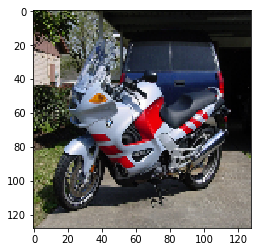

In [9]:
index = 128  #Index of the sample image to be visualized
plt.imshow(x_test[index])
plt.savefig('Computer_Vision_Project/Original')

In [0]:
def get_lo_images(model_predictions,img_id,nR,nC):  #Provides the layer output images of the predictions of the given layer
    vStack = []
    for i in range(nC):
        h_list = [model_predictions[img_id,:,:,((i+1)*(j+1))-1] for j in range(nR)]
        h_tuple = tuple(h_list)
        vStack.append(np.hstack((h_tuple)))

    image_list = [tuple(vStack[j]) for j in range(nC)]
    image = np.vstack((tuple(image_list)))
    return image

conv2d_1
(735, 128, 128, 64)


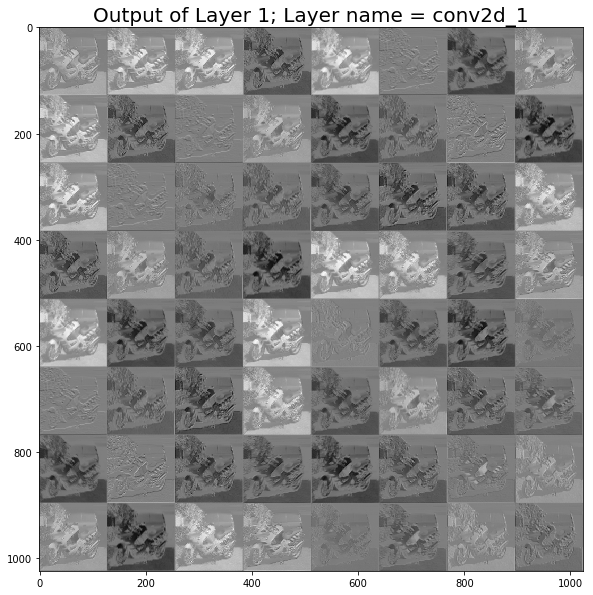

In [11]:
layer = 1
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,8,8)
plt.figure(figsize=(10,10))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

batch_normalization_1
(735, 128, 128, 64)


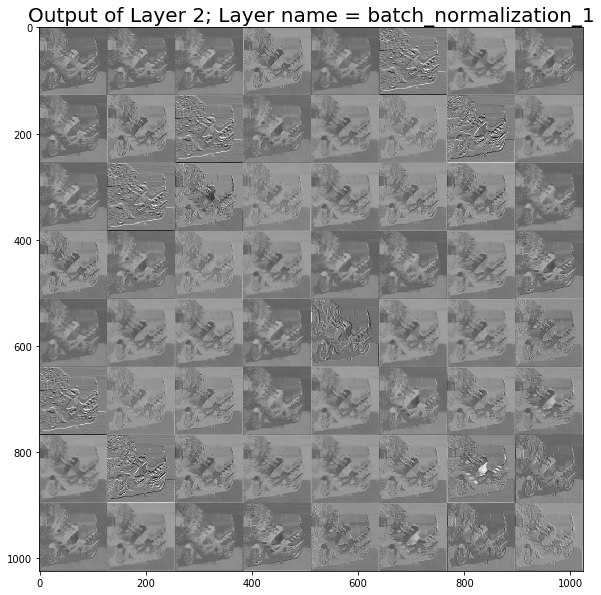

In [12]:
layer = 2
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,8,8)
plt.figure(figsize=(10,10))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

activation_1
(735, 128, 128, 64)


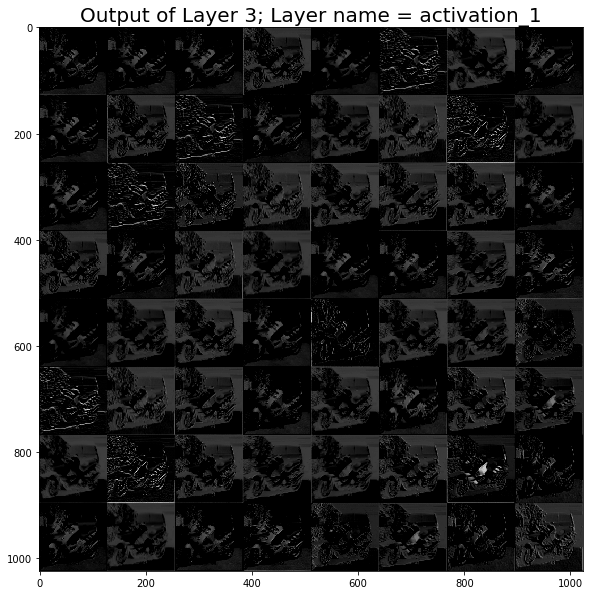

In [13]:
layer = 3
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,8,8)
plt.figure(figsize=(10,10))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

max_pooling2d_1
(735, 64, 64, 64)


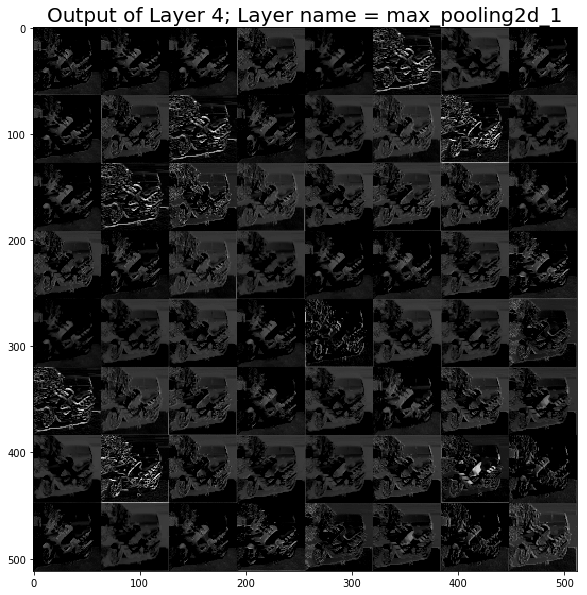

In [14]:
layer = 4
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,8,8)
plt.figure(figsize=(10,10))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

conv2d_2
(735, 64, 64, 32)


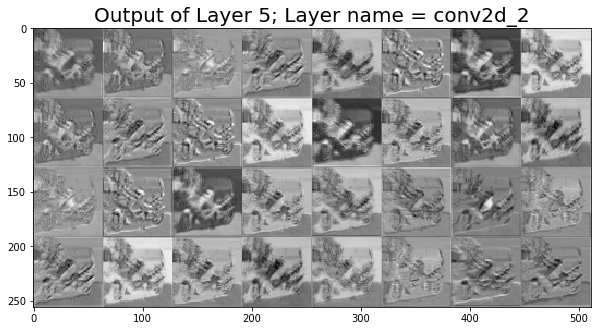

In [15]:
layer = 5
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,8,4)
plt.figure(figsize=(10,10))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

batch_normalization_2
(735, 64, 64, 32)


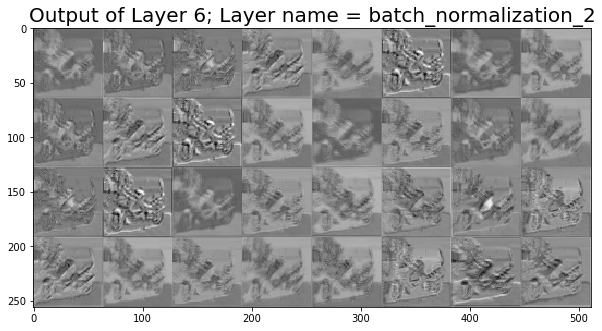

In [16]:
layer = 6
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,8,4)
plt.figure(figsize=(10,10))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

activation_2
(735, 64, 64, 32)


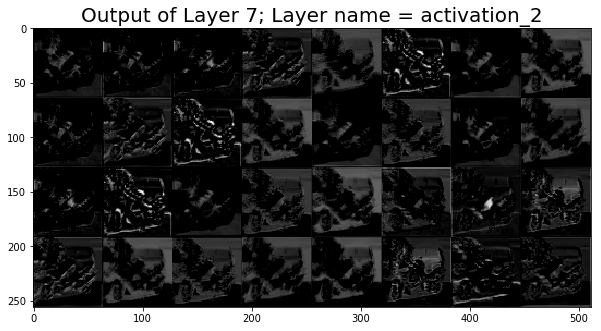

In [17]:
layer = 7
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,8,4)
plt.figure(figsize=(10,10))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

max_pooling2d_2
(735, 32, 32, 32)


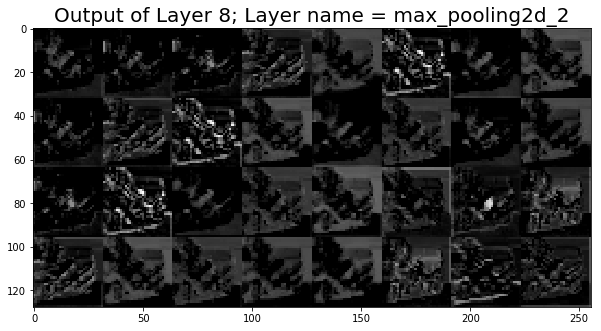

In [18]:
layer = 8
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,8,4)
plt.figure(figsize=(10,10))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

conv2d_3
(735, 32, 32, 16)


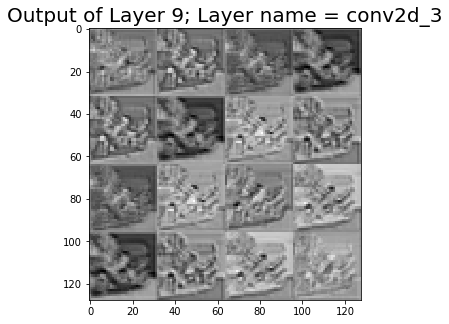

In [19]:
layer = 9
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,4,4)
plt.figure(figsize=(5,5))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

batch_normalization_3
(735, 32, 32, 16)


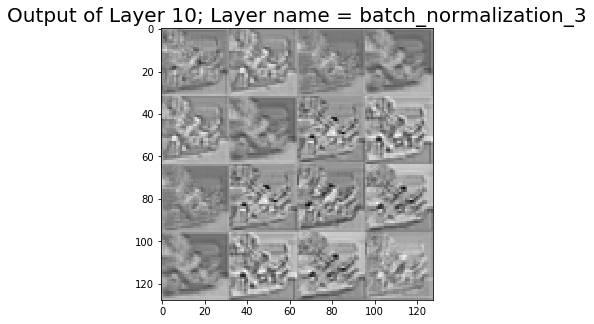

In [20]:
layer = 10
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,4,4)
plt.figure(figsize=(5,5))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

activation_3
(735, 32, 32, 16)


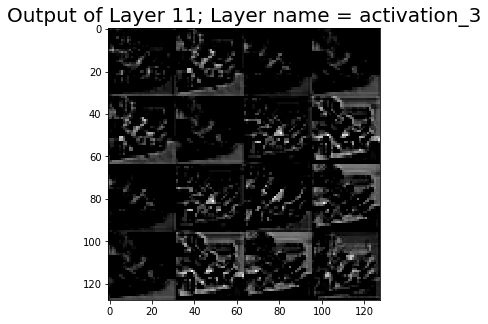

In [21]:
layer = 11
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,4,4)
plt.figure(figsize=(5,5))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

code
(735, 16, 16, 16)


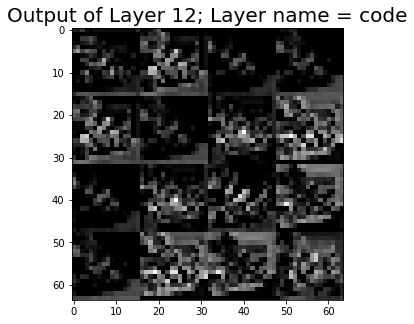

In [22]:
layer = 12
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,4,4)
plt.figure(figsize=(5,5))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

conv2d_4
(735, 16, 16, 16)


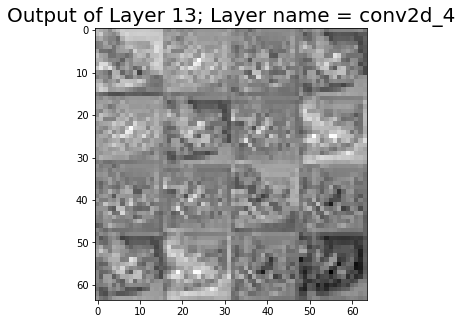

In [23]:
layer = 13
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,4,4)
plt.figure(figsize=(5,5))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

batch_normalization_4
(735, 16, 16, 16)


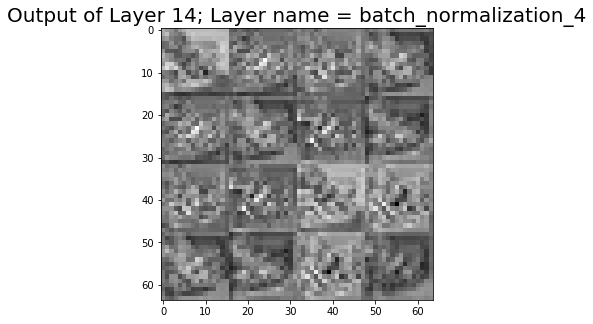

In [24]:
layer = 14
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,4,4)
plt.figure(figsize=(5,5))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

activation_4
(735, 16, 16, 16)


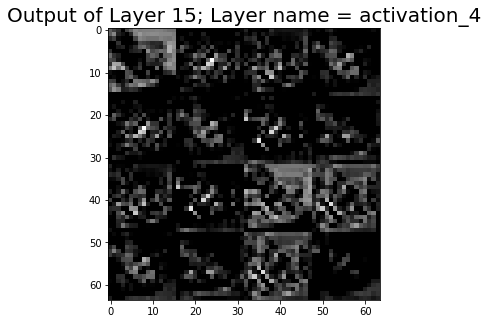

In [25]:
layer = 15
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,4,4)
plt.figure(figsize=(5,5))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

up_sampling2d_1
(735, 32, 32, 16)


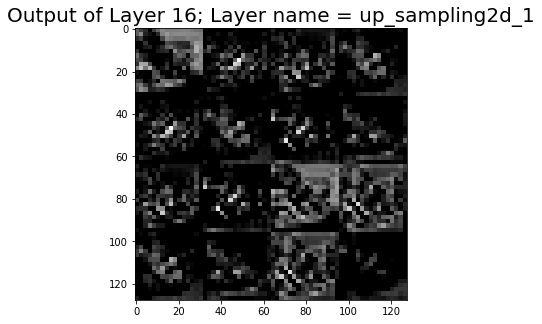

In [26]:
layer = 16
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,4,4)
plt.figure(figsize=(5,5))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

conv2d_5
(735, 32, 32, 32)


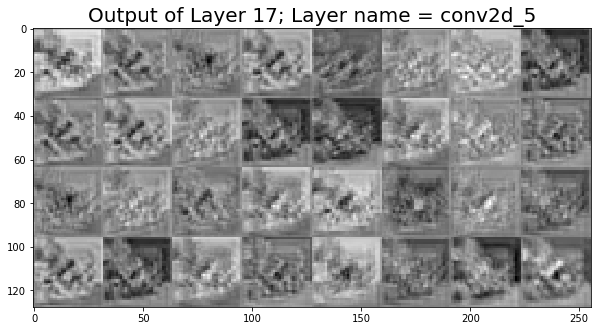

In [27]:
layer = 17
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,8,4)
plt.figure(figsize=(10,10))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

batch_normalization_5
(735, 32, 32, 32)


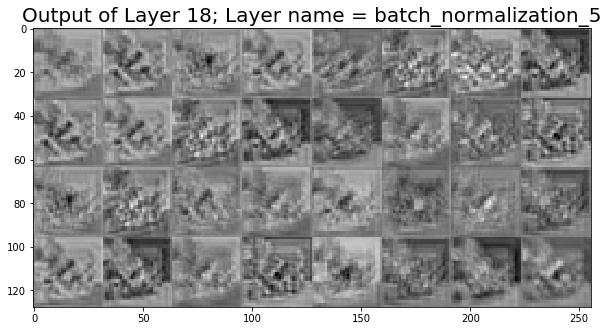

In [28]:
layer = 18
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,8,4)
plt.figure(figsize=(10,10))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

activation_5
(735, 32, 32, 32)


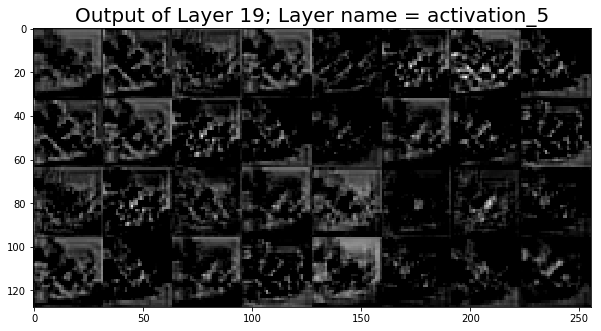

In [29]:
layer = 19
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,8,4)
plt.figure(figsize=(10,10))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

up_sampling2d_2
(735, 64, 64, 32)


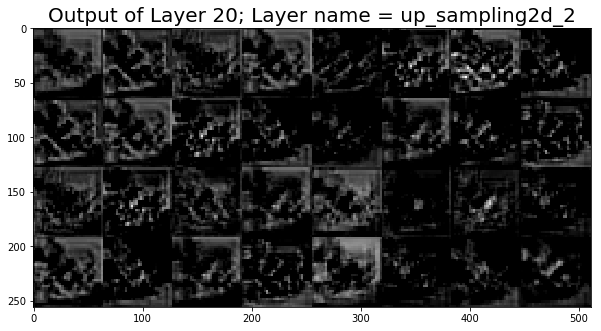

In [30]:
layer = 20
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,8,4)
plt.figure(figsize=(10,10))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

conv2d_6
(735, 64, 64, 64)


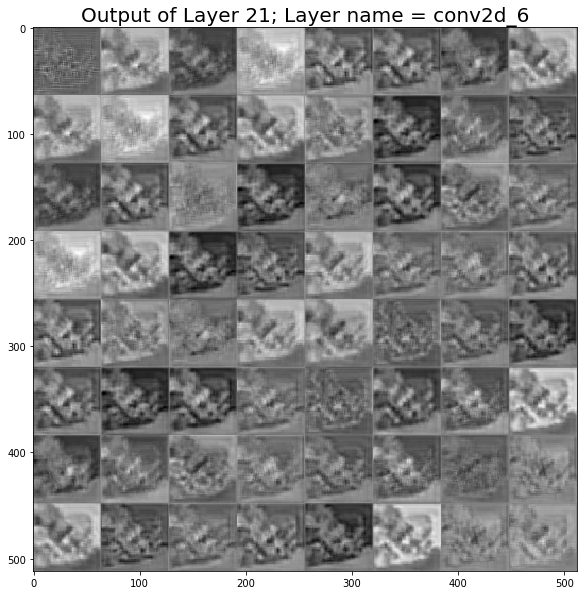

In [31]:
layer = 21
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,8,8)
plt.figure(figsize=(10,10))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

batch_normalization_6
(735, 64, 64, 64)


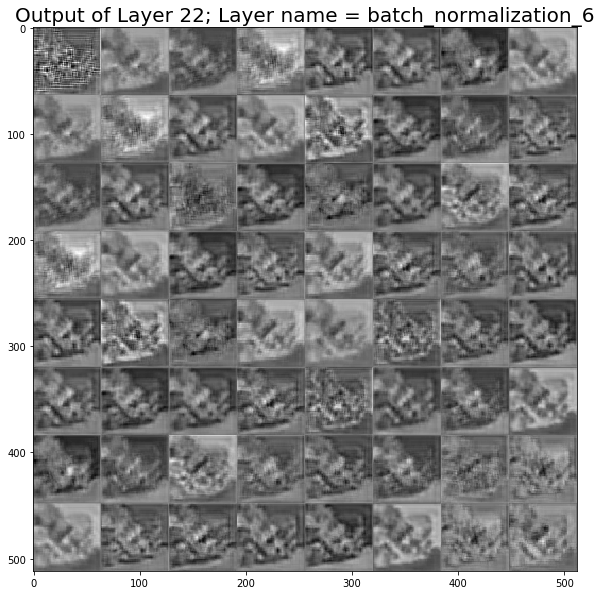

In [32]:
layer = 22
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,8,8)
plt.figure(figsize=(10,10))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

activation_6
(735, 64, 64, 64)


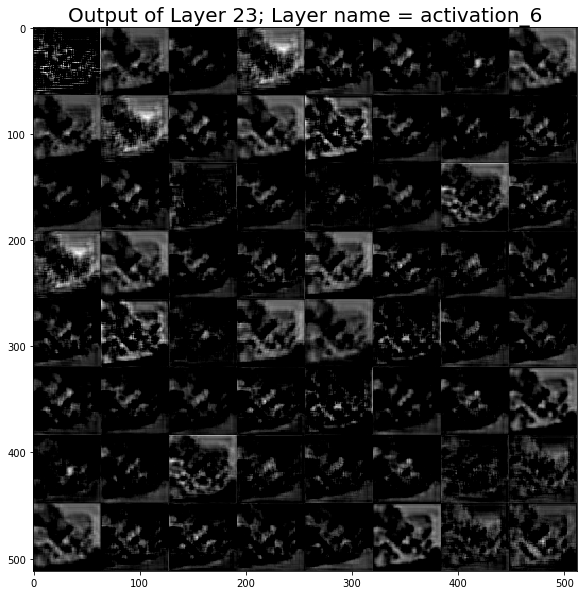

In [33]:
layer = 23
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,8,8)
plt.figure(figsize=(10,10))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

up_sampling2d_3
(735, 128, 128, 64)


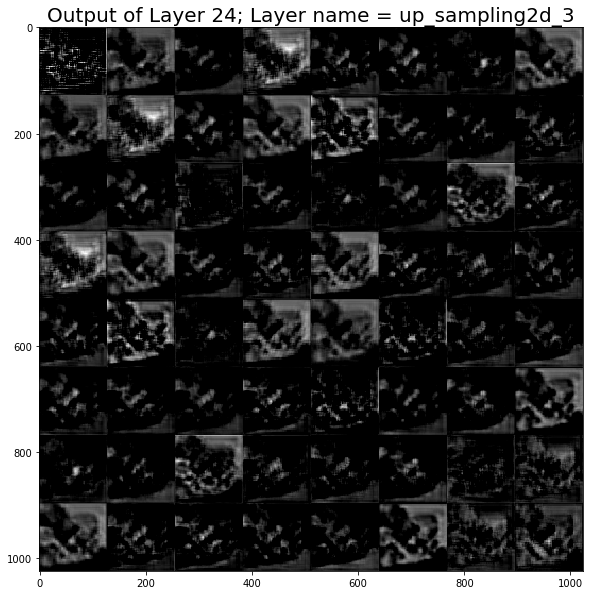

In [34]:
layer = 24
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,8,8)
plt.figure(figsize=(10,10))
plt.imshow(lo_images,cmap='gray')
plt.title('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

conv2d_7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(735, 128, 128, 3)


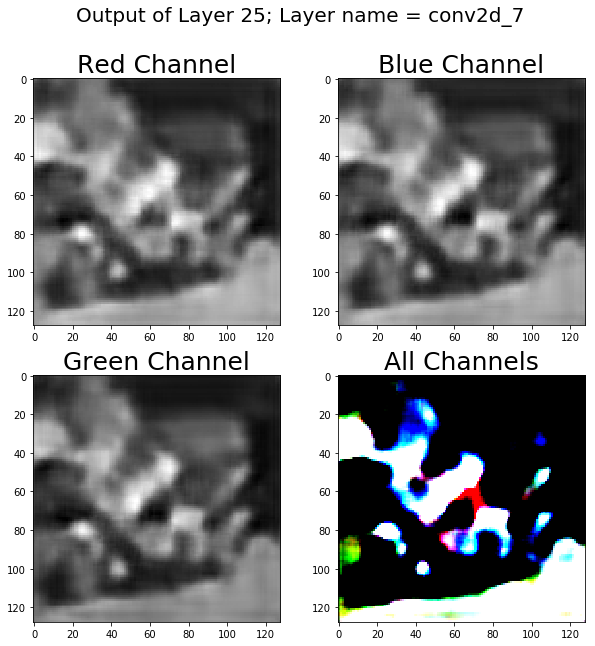

In [35]:
layer = 25
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,3,1)
fig = plt.figure(figsize=(10,10))
ax = fig.subplots(2, 2)
ax[0,0].imshow(lo_images[:,:128],cmap='gray')
ax[0,0].set_title('Red Channel', fontdict={'fontsize': 25, 'fontweight': 'medium'})
ax[0,1].imshow(lo_images[:,128:256],cmap='gray')
ax[0,1].set_title('Blue Channel', fontdict={'fontsize': 25, 'fontweight': 'medium'})
ax[1,0].imshow(lo_images[:,256:],cmap='gray')
ax[1,0].set_title('Green Channel', fontdict={'fontsize': 25, 'fontweight': 'medium'})
ax[1,1].imshow(layer_predictions[index])
ax[1,1].set_title('All Channels', fontdict={'fontsize': 25, 'fontweight': 'medium'})
fig.suptitle('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

batch_normalization_7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(735, 128, 128, 3)


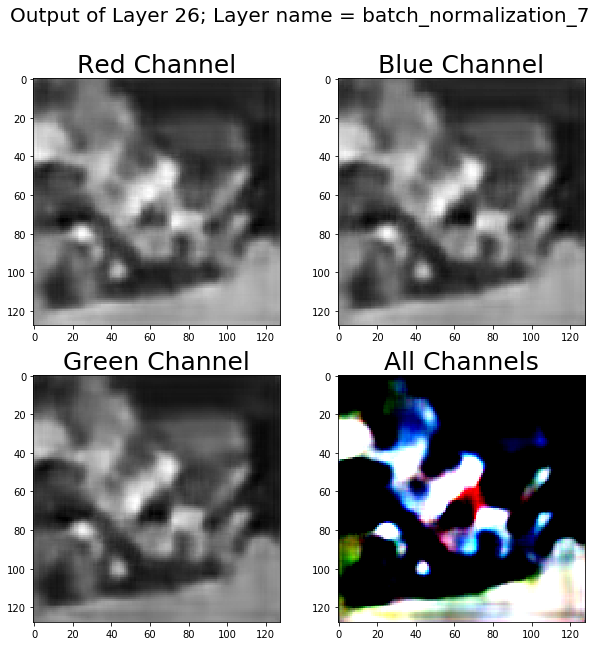

In [36]:
layer = 26
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,3,1)
fig = plt.figure(figsize=(10,10))
ax = fig.subplots(2, 2)
ax[0,0].imshow(lo_images[:,:128],cmap='gray')
ax[0,0].set_title('Red Channel', fontdict={'fontsize': 25, 'fontweight': 'medium'})
ax[0,1].imshow(lo_images[:,128:256],cmap='gray')
ax[0,1].set_title('Blue Channel', fontdict={'fontsize': 25, 'fontweight': 'medium'})
ax[1,0].imshow(lo_images[:,256:],cmap='gray')
ax[1,0].set_title('Green Channel', fontdict={'fontsize': 25, 'fontweight': 'medium'})
ax[1,1].imshow(layer_predictions[index])
ax[1,1].set_title('All Channels', fontdict={'fontsize': 25, 'fontweight': 'medium'})
fig.suptitle('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

activation_7
(735, 128, 128, 3)


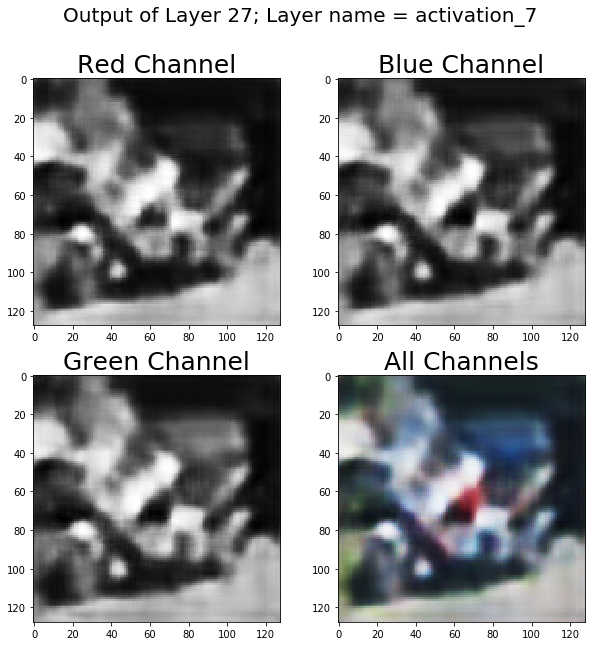

In [37]:
layer = 27
print(conv_autoencoder.layers[layer].name)
layer_model = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.layers[layer].output)
layer_predictions = layer_model.predict(x_test)
print(np.shape(layer_predictions))

lo_images = get_lo_images(layer_predictions,index,3,1)
fig = plt.figure(figsize=(10,10))
ax = fig.subplots(2, 2)
ax[0,0].imshow(lo_images[:,:128],cmap='gray')
ax[0,0].set_title('Red Channel', fontdict={'fontsize': 25, 'fontweight': 'medium'})
ax[0,1].imshow(lo_images[:,128:256],cmap='gray')
ax[0,1].set_title('Blue Channel', fontdict={'fontsize': 25, 'fontweight': 'medium'})
ax[1,0].imshow(lo_images[:,256:],cmap='gray')
ax[1,0].set_title('Green Channel', fontdict={'fontsize': 25, 'fontweight': 'medium'})
ax[1,1].imshow(layer_predictions[index])
ax[1,1].set_title('All Channels', fontdict={'fontsize': 25, 'fontweight': 'medium'})
fig.suptitle('Output of Layer '+str(layer)+'; Layer name = ' + str(conv_autoencoder.layers[layer].name), fontsize=20)
plt.savefig('Computer_Vision_Project/Layerno_'+str(layer))

# The output images of all layers in order

<img src="Computer_Vision_Project/Original.png">
<img src="Computer_Vision_Project/Layerno_1.png">
<img src="Computer_Vision_Project/Layerno_2.png">
<img src="Computer_Vision_Project/Layerno_3.png">
<img src="Computer_Vision_Project/Layerno_4.png">
<img src="Computer_Vision_Project/Layerno_5.png">
<img src="Computer_Vision_Project/Layerno_6.png">
<img src="Computer_Vision_Project/Layerno_7.png">
<img src="Computer_Vision_Project/Layerno_8.png">
<img src="Computer_Vision_Project/Layerno_9.png">
<img src="Computer_Vision_Project/Layerno_10.png">
<img src="Computer_Vision_Project/Layerno_11.png">
<img src="Computer_Vision_Project/Layerno_12.png">
<img src="Computer_Vision_Project/Layerno_13.png">
<img src="Computer_Vision_Project/Layerno_14.png">
<img src="Computer_Vision_Project/Layerno_15.png">
<img src="Computer_Vision_Project/Layerno_16.png">
<img src="Computer_Vision_Project/Layerno_17.png">
<img src="Computer_Vision_Project/Layerno_18.png">
<img src="Computer_Vision_Project/Layerno_19.png">
<img src="Computer_Vision_Project/Layerno_20.png">
<img src="Computer_Vision_Project/Layerno_21.png">
<img src="Computer_Vision_Project/Layerno_22.png">
<img src="Computer_Vision_Project/Layerno_23.png">
<img src="Computer_Vision_Project/Layerno_24.png">
<img src="Computer_Vision_Project/Layerno_25.png">
<img src="Computer_Vision_Project/Layerno_26.png">
<img src="Computer_Vision_Project/Layerno_27.png">